<a href="https://colab.research.google.com/github/ThallaPremSai/DAUP-2025/blob/main/2203A52179_DAUP_B34_LAB-3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('/content/dermatology_database_1.csv')


data = data.replace('?', np.nan)


for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')


from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)


X = data.drop(columns=['class'])
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Results:")
print(classification_report(y_test, y_pred_svm))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

SVM Results:
              precision    recall  f1-score   support

         1.0       0.91      0.97      0.94        40
         2.0       0.36      1.00      0.53        16
         3.0       1.00      1.00      1.00        19
         4.0       0.00      0.00      0.00        15
         5.0       0.00      0.00      0.00        16
         6.0       0.75      0.75      0.75         4

    accuracy                           0.70       110
   macro avg       0.50      0.62      0.54       110
weighted avg       0.58      0.70      0.62       110

SVM Accuracy: 0.7


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [4]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Results:
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        40
         2.0       0.83      0.94      0.88        16
         3.0       1.00      1.00      1.00        19
         4.0       0.92      0.80      0.86        15
         5.0       1.00      1.00      1.00        16
         6.0       1.00      1.00      1.00         4

    accuracy                           0.96       110
   macro avg       0.96      0.96      0.96       110
weighted avg       0.97      0.96      0.96       110

Random Forest Accuracy: 0.9636363636363636


In [5]:
from scipy.stats import zscore
z_scores = np.abs(zscore(X))
threshold = 3
outlier_indices = np.where(z_scores > threshold)
print(f"Number of outliers: {len(np.unique(outlier_indices[0]))}")

Number of outliers: 106


In [6]:
X_clean = X[(z_scores < threshold).all(axis=1)]
y_clean = y[(z_scores < threshold).all(axis=1)]

In [7]:
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(
    X_clean, y_clean, test_size=0.3, random_state=42)

In [8]:
svm.fit(X_train_clean, y_train_clean)
y_pred_svm_clean = svm.predict(X_test_clean)
print("SVM Results After Removing Outliers:")
print(classification_report(y_test_clean, y_pred_svm_clean))
print("SVM Accuracy After Removing Outliers:", accuracy_score(y_test_clean, y_pred_svm_clean))

SVM Results After Removing Outliers:
              precision    recall  f1-score   support

         1.0       0.85      1.00      0.92        29
         2.0       0.33      0.14      0.20        14
         3.0       1.00      0.47      0.64        15
         4.0       0.29      0.75      0.42        12
         5.0       0.00      0.00      0.00         8

    accuracy                           0.60        78
   macro avg       0.50      0.47      0.44        78
weighted avg       0.61      0.60      0.56        78

SVM Accuracy After Removing Outliers: 0.6025641025641025


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [9]:
rf.fit(X_train_clean, y_train_clean)
y_pred_rf_clean = rf.predict(X_test_clean)
print("Random Forest Results After Removing Outliers:")
print(classification_report(y_test_clean, y_pred_rf_clean))
print("Random Forest Accuracy After Removing Outliers:", accuracy_score(y_test_clean, y_pred_rf_clean))

Random Forest Results After Removing Outliers:
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        29
         2.0       0.85      0.79      0.81        14
         3.0       1.00      1.00      1.00        15
         4.0       0.77      0.83      0.80        12
         5.0       1.00      1.00      1.00         8

    accuracy                           0.94        78
   macro avg       0.92      0.92      0.92        78
weighted avg       0.94      0.94      0.94        78

Random Forest Accuracy After Removing Outliers: 0.9358974358974359


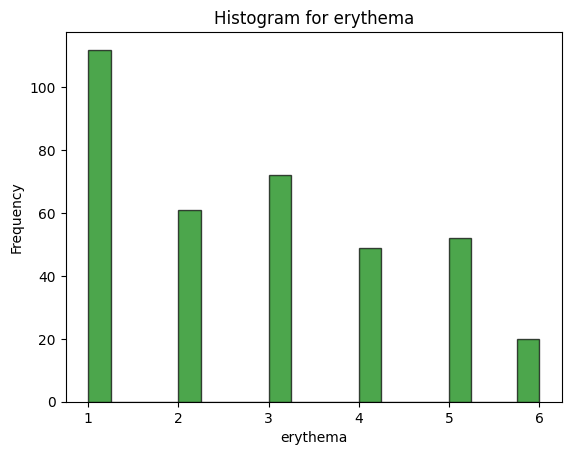

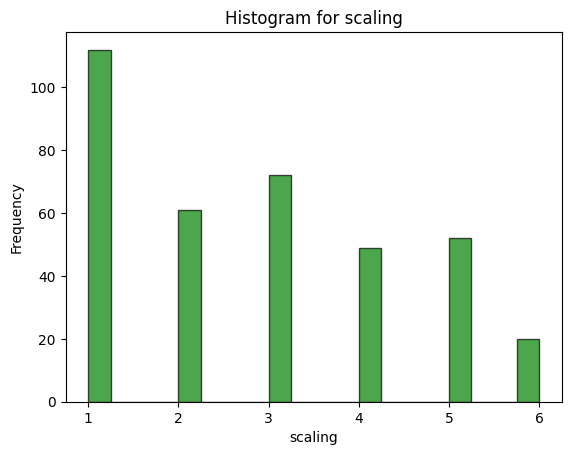

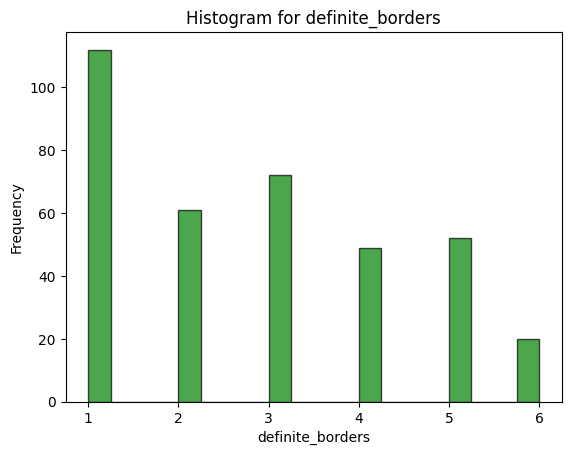

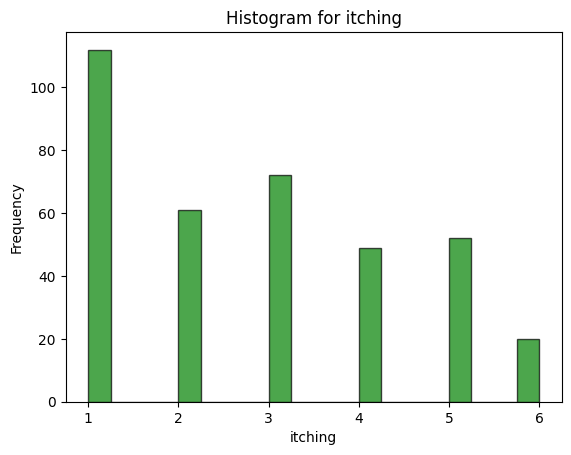

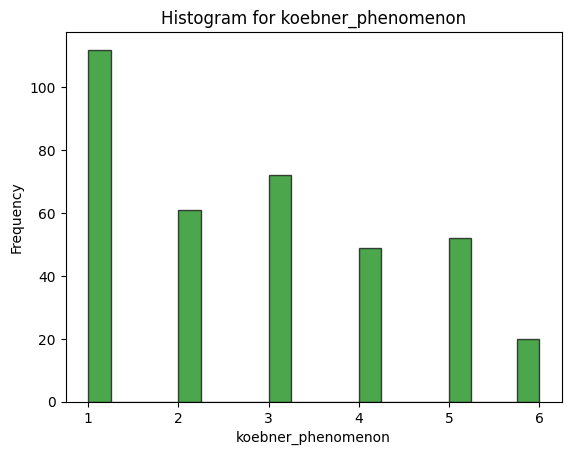

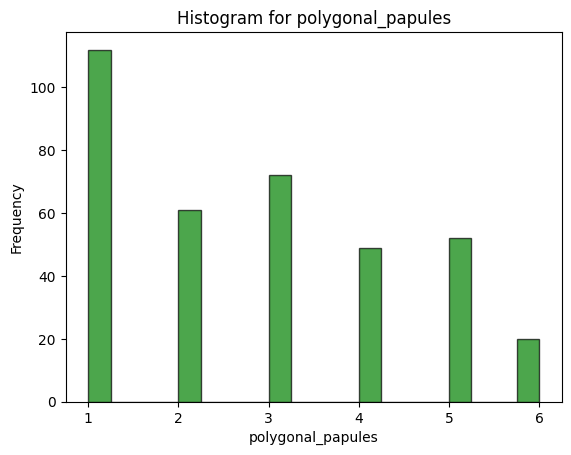

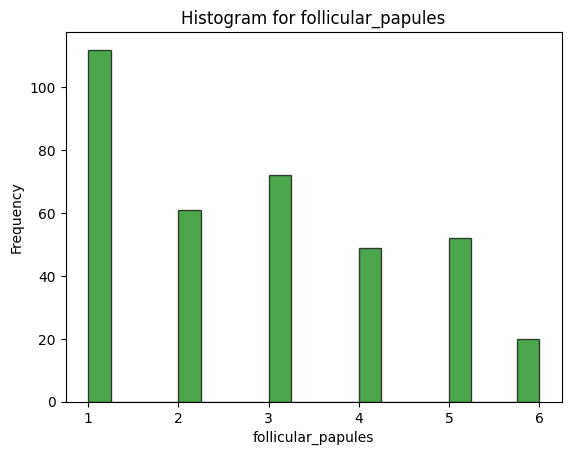

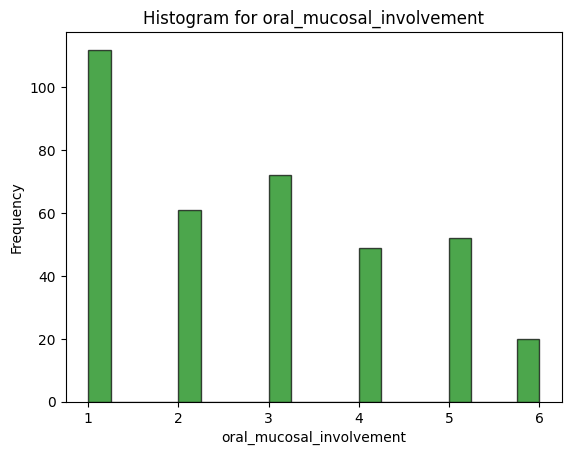

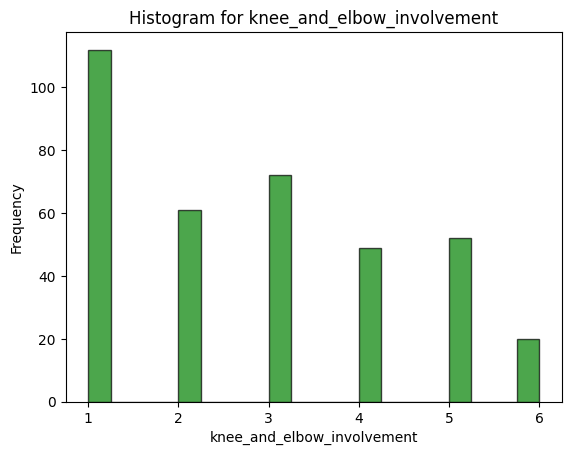

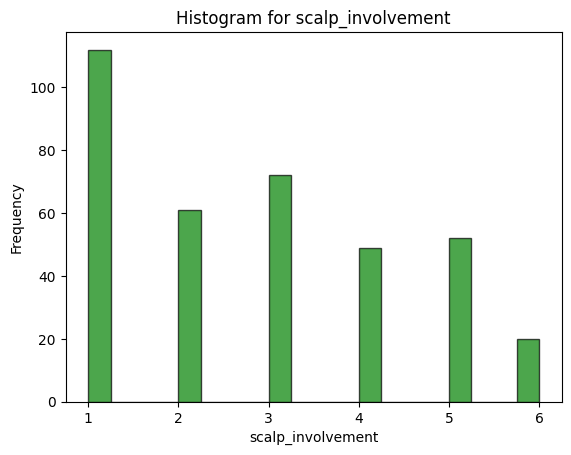

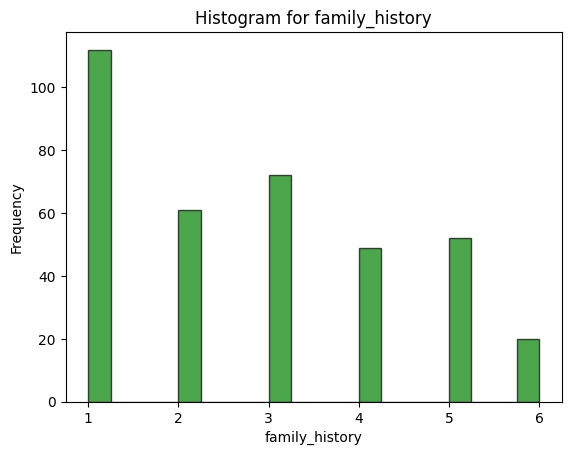

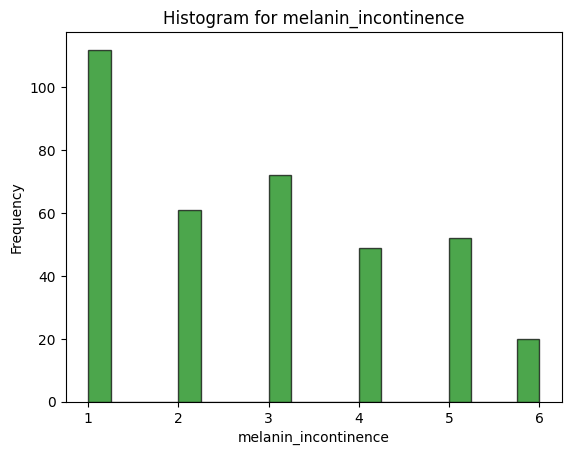

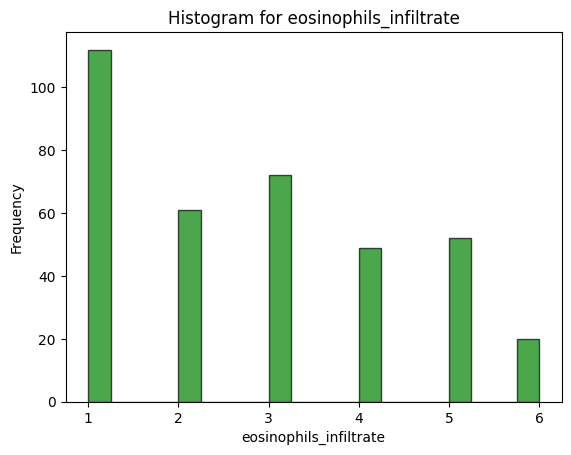

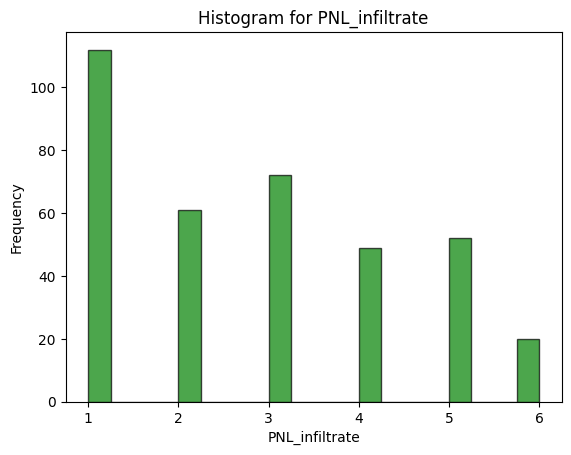

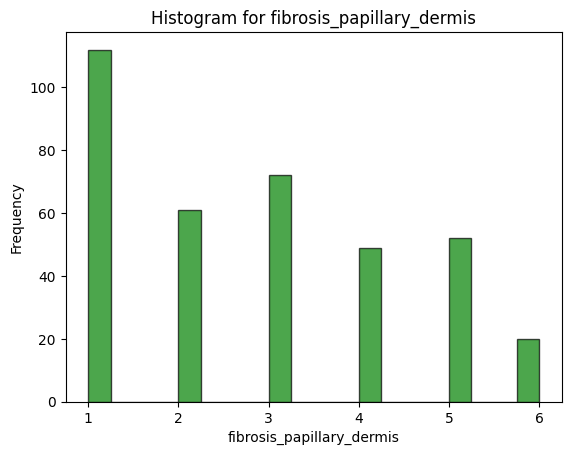

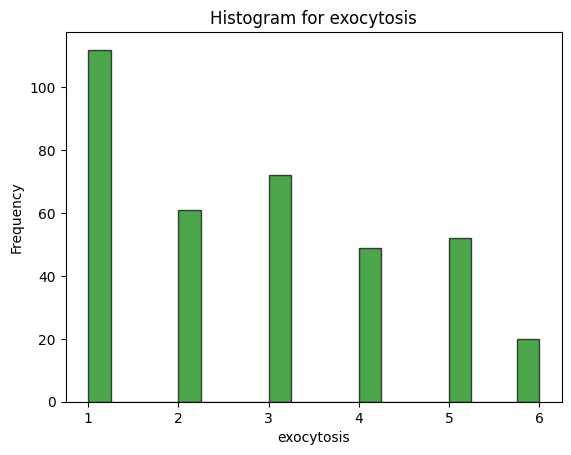

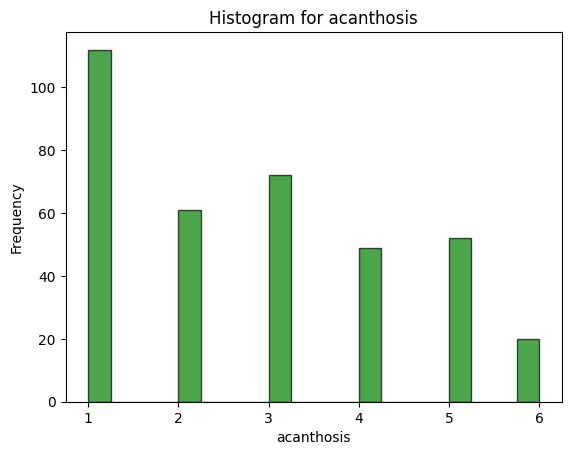

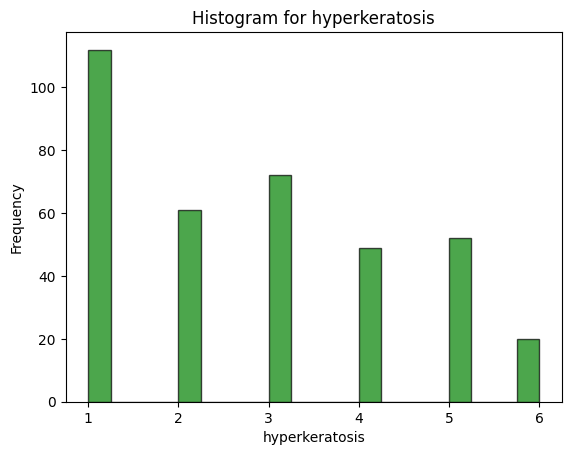

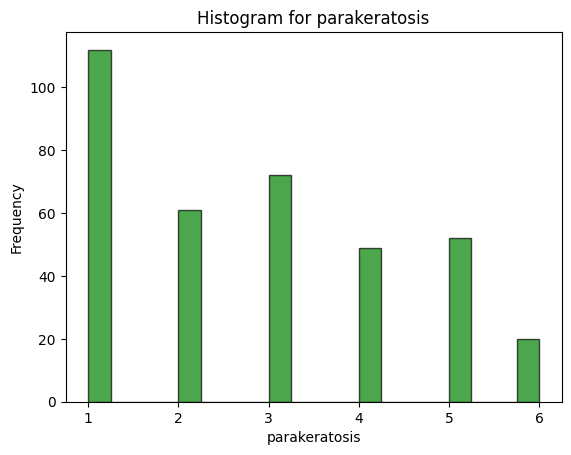

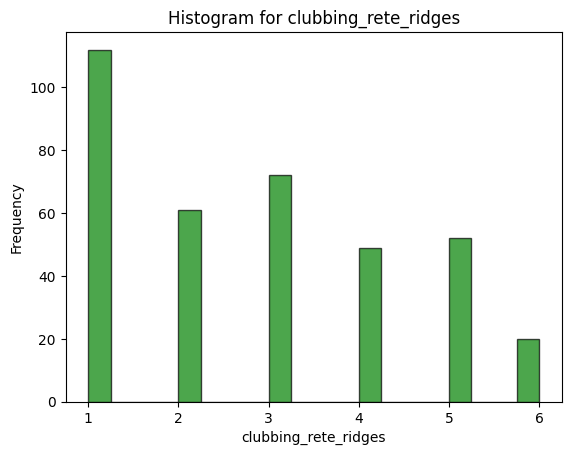

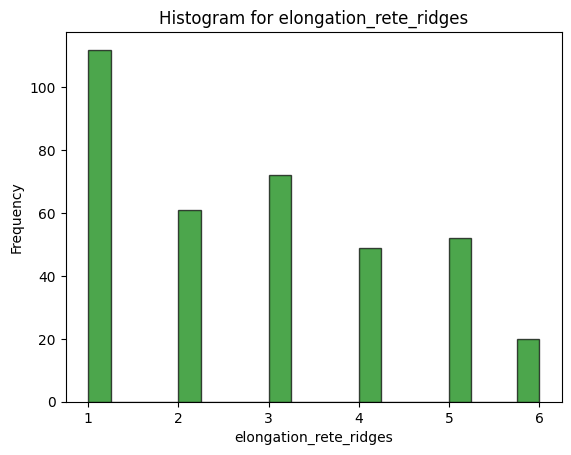

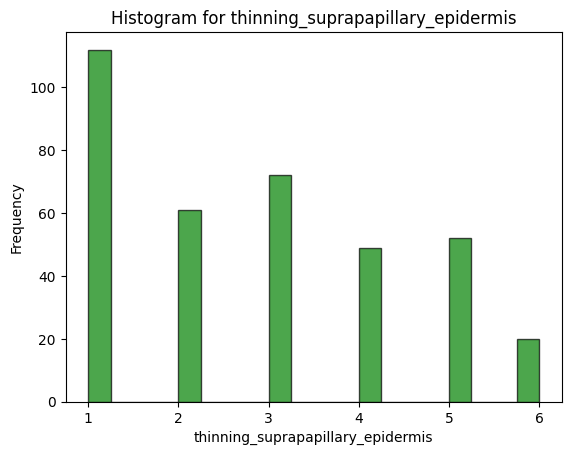

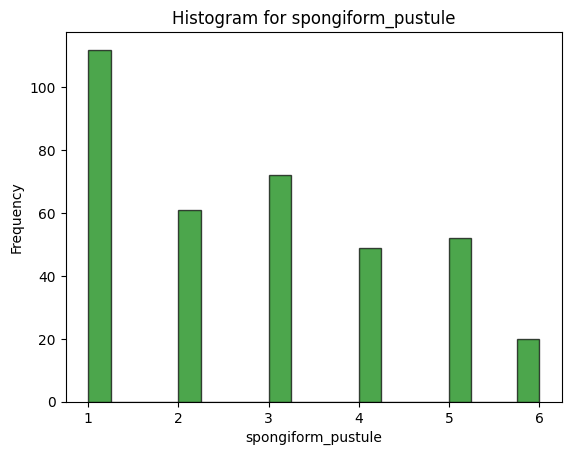

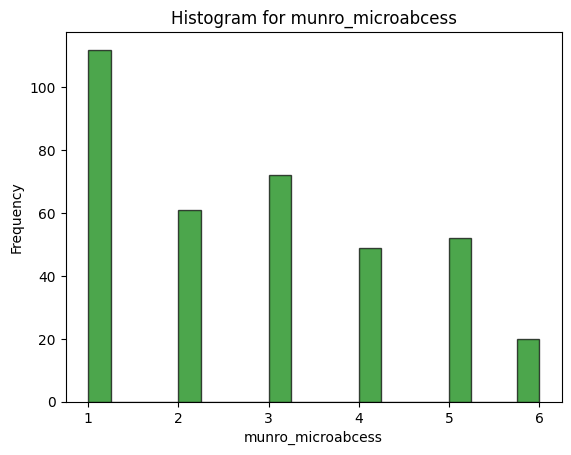

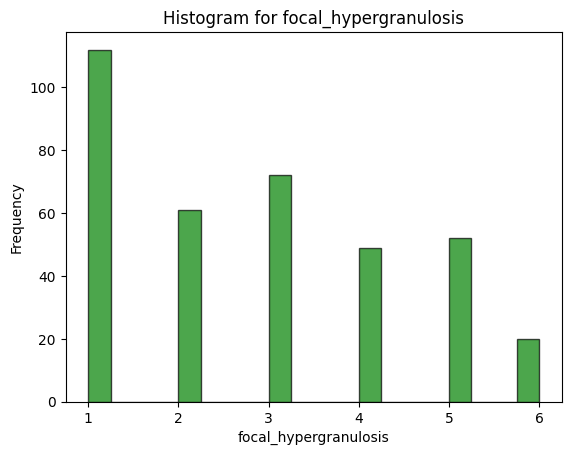

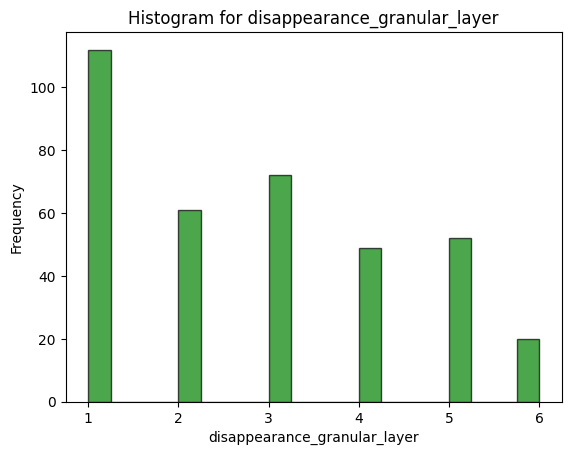

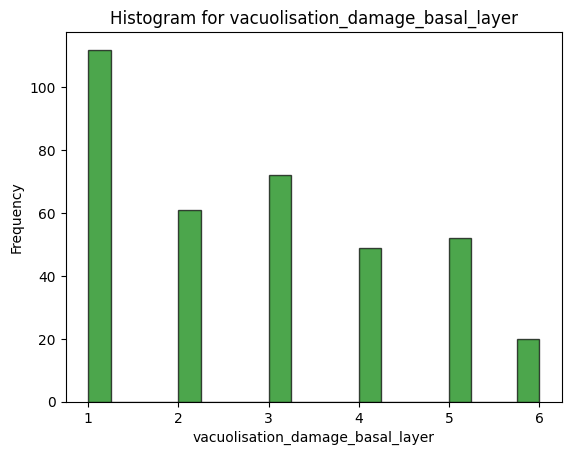

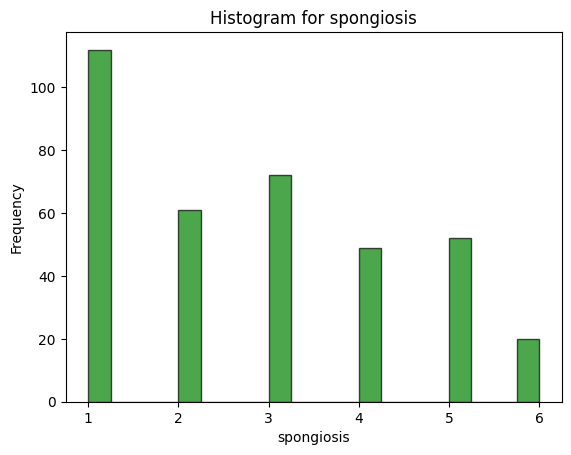

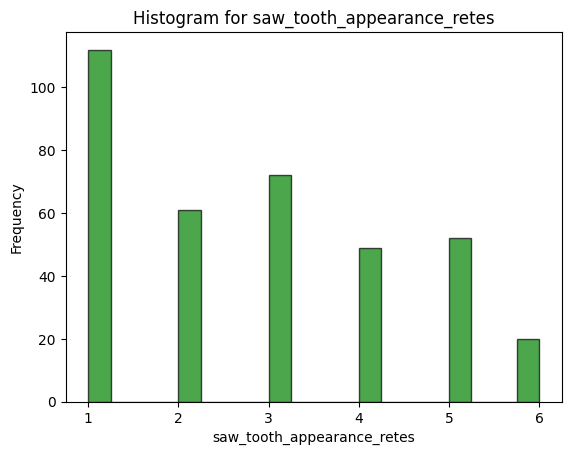

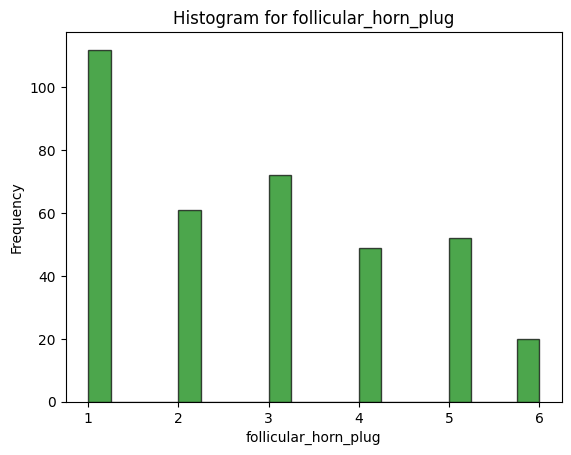

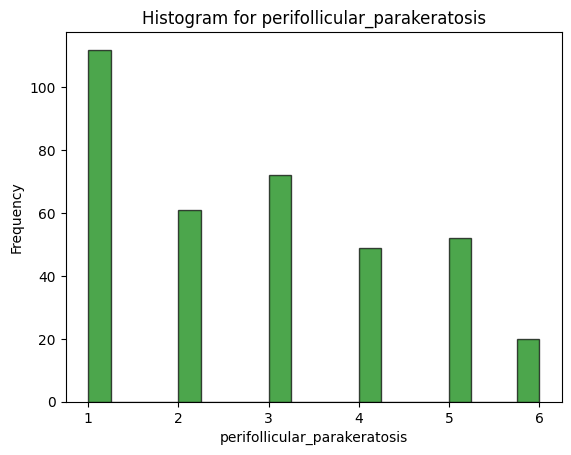

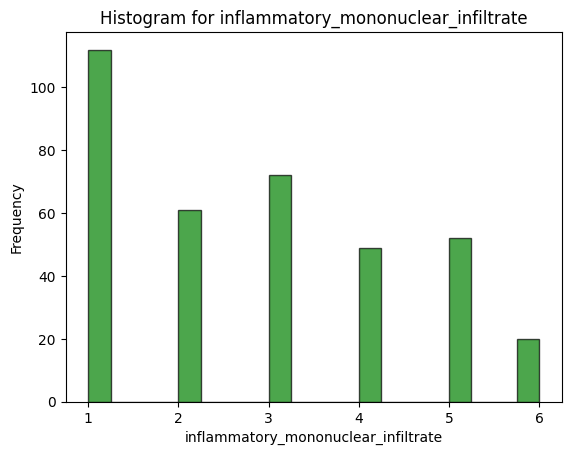

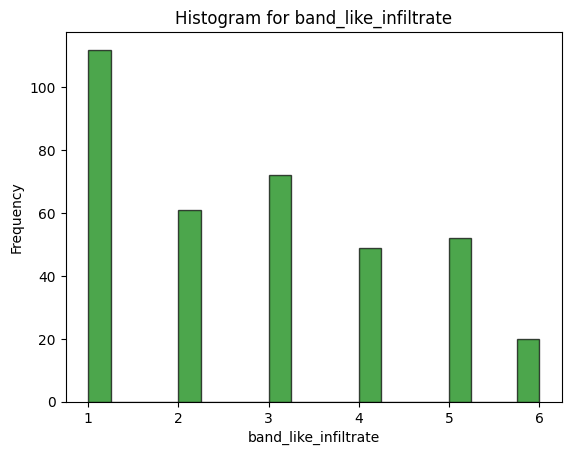

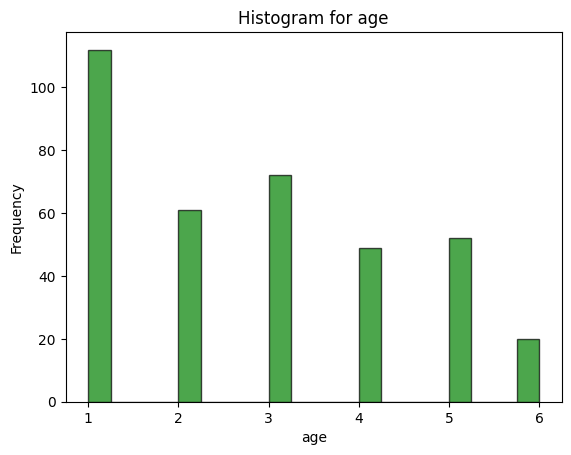

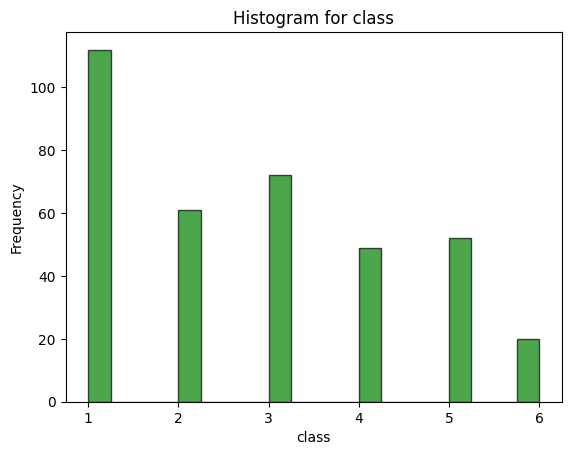

In [12]:
for column in data.columns:
    plt.figure()
    plt.hist(data[col], bins=20, alpha=0.7, color='green', edgecolor='black')
    plt.title(f"Histogram for {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()